# James Rice - JDS Class of Feb 2020  

### About This Notebook
The information contained in this notebook under "**About The Business**", "**About The Data Set**", and "**The Final Test Task**" constitute the final week task of the [Junior Data Scientist's First Month Video Course](https://data36.com/the-junior-data-scientists-first-month-online-course/), taught by [Tomi Mester](https://www.linkedin.com/in/tomimester/), with assistance from [Tamas Stefanovits](https://www.linkedin.com/in/tstefanovits/). 

To view the slides I prepared for Dilan to help him grow his business, click [here](https://docs.google.com/presentation/d/e/2PACX-1vSUNSCANCMhGrp1aOxCJYxx9HWCyZ2T9iKBY7T3XbwgPkDEOMusVTCEQD0dbHaD7s7AUzbDy2c2Lvgs/pub?start=false&loop=false&delayms=10000). Check out my code below, under the heading "**My Solution Code**." 

# Project Prompt

## About The Business

*Disclaimer: this is not a real business. Any similarity to reality is purely coincidental.*
<img src="https://www.filepicker.io/api/file/koqo0mD3SGuyl0l30Zf0">

Dilan is a world traveler and a solo entrepreneur. He writes a travel blog where he sells info products: a \\$8 e-book (World Travelers' Best Practices) and a \\$80 video course (How To Travel the World).

On his blog he has thousands of readers every day, coming from three sources: Reddit, SEO and AdWords.

Dilan writes about his travel experiences covering the 6 main continents of the planet - these are the main categories on the blog.

The business strategy is simple:
1. New readers visit the blog.
2. They read articles.
3. They subscribe to the newsletter.
4. They purchase the info products.

<img src="https://www.filepicker.io/api/file/zYOxovtMSdWXlpf5M4jA" >
Dilan's travel blog is available in 8 (and only 8) different countries.

The marketing budget is not too high at the moment: Dilan spends only ~\\$1000 a month combined:

<ul><li>for Adwords advertisement (\$500 a month for paid ads),</li>
<li>for SEO (\$250 a month for editing) and</li>
<li>for Reddit (\$250 USD for content creation)</li></ul>
And he only has two products!

He wants to invest more (time, work and money). But how to do that the most efficiently? What should he focus on?
That's where he needs your help!
## About The Data Set

In this data set, you will find the raw user activity data from Dilan's blog between 1 January 2018 and 31 March 2018. It's a log with 600,000 rows.

<img src="https://www.filepicker.io/api/file/s2QvckubTu2mTXxobjQP">

1. The whole data log is one big file. You don't have to worry about automation and refreshing the data.
2. This is the ```.csv``` file. The field separator is a semi-colon (```;```).
3. The first column is the date and the time of the event, in this format: ```YYYY-MM-DD HH:MM:SS``` (eg. 2018-03-30 23:48:48).
4. The second column is the event type. There are three different event types:
  1. *read*
  2. *subscribe*
  3. *buy*
5. The rest of the columns depend on the event type:
  1. For *read* there are two options:
    1. If this is the first visit from the given user, then the next fields are: country; user_id; source; topic
    2. If it's a returning reader, then these are the fields: country; user_id; topic
  2. For *subscribe* there is only one additional column: user_id
  3. For *buy* there are two more columns: user_id and the price of the product the user bought.
6. Examples for each event type:
  1. First time reader: ```2018-03-30 23:59:56;read;country_5;2458361283;Reddit;Asia```
  2. Returning reader: ```2018-03-31 05:04:50;read;country_4;2458361208;Africa```
  3. Subscriber: ```2018-03-30 23:48:48;subscribe;2458173588```
  4. Purchase: ```2018-03-30 23:11:30;buy;2458339835;80```
7. The country column has 8 different values: country_1, country_2, ..., country_8
8. The source column has 3 different values:
  1. Reddit
  2. AdWords
  3. SEO
9. The topic column:
  1. Africa
  2. Europe
  3. South America
  4. North America
  5. Australia
  6. Asia
10. The course price column:
  1. 8
  2. 80
  


## The Final Test Task
The final test task is simple:

Dilan wants to spend more time and more money on his business. He wants to focus on one country first.


1. **In which country should he prioritise his effort and why?**
2. **Any other advice to Dilan on how to be smart with his investments based on the data from the last 3 months?**
3. **Can you see any more interesting information (beyond the above 2 questions) in the data from which Dilan could profit?**

 Answer these questions and create a PowerPoint or Keynote presentation in which you introduce your solution (with min. 10, max. 20 slides)!

# My Solution Code

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
%%bash
wget 46.101.230.157/testtask/dilans_data.csv;

cat dilans_data.csv | grep 'subscribe' > subscribe.csv;
cat dilans_data.csv | grep 'read' > read.csv;
cat dilans_data.csv | grep 'buy' > buy.csv;

cat read.csv | grep 'Reddit' | cut -d';' -f1,4,5 >> source.csv;
cat read.csv | grep 'AdWords' | cut -d';' -f1,4,5 >> source.csv;
cat read.csv | grep 'SEO' | cut -d';' -f1,4,5 >> source.csv;

cat read.csv | grep 'Reddit' | cut -d';' -f1,2,3,4,6  >> clean.csv;
cat read.csv | grep 'Adwords' | cut -d';' -f1,2,3,4,6  >> clean.csv;
cat read.csv | grep 'SEO' | cut -d';' -f1,2,3,4,6  >> clean.csv;
cat read.csv | grep -v  'SEO' | grep -v 'Reddit' | grep -v 'AdWords' >> clean.csv;


--2020-03-31 22:39:11--  http://46.101.230.157/testtask/dilans_data.csv
Connecting to 46.101.230.157:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34060918 (32M) [application/octet-stream]
Saving to: ‘dilans_data.csv’

     0K .......... .......... .......... .......... ..........  0%  176K 3m9s
    50K .......... .......... .......... .......... ..........  0%  350K 2m22s
   100K .......... .......... .......... .......... ..........  0% 68.5M 94s
   150K .......... .......... .......... .......... ..........  0%  352K 94s
   200K .......... .......... .......... .......... ..........  0% 59.6M 75s
   250K .......... .......... .......... .......... ..........  0% 55.4M 63s
   300K .......... .......... .......... .......... ..........  1% 63.8M 54s
   350K .......... .......... .......... .......... ..........  1%  350K 59s
   400K .......... .......... .......... .......... ..........  1% 92.6M 52s
   450K .......... .......... .......... .......... .......

In [0]:
# create pandas DataFrames: buy, read, source, subscribe
buy = pd.read_csv('buy.csv', delimiter=';', names=['day_time', 'event', 'user_id', 'price'], parse_dates=True, index_col='day_time' )
read = pd.read_csv('clean.csv', delimiter=';', names=['day_time','event', 'country' , 'user_id' , 'topic'], parse_dates=True, index_col='day_time')
source = pd.read_csv('source.csv', delimiter=';', names=['day_time','user_id', 'source'], parse_dates=True, index_col='day_time')                
subscribe = pd.read_csv('subscribe.csv', delimiter=';', names=['day_time', 'event', 'user_id'], parse_dates=True, index_col='day_time')

# modify source and concatenate selected columns for the four activities: events
source['event'] = 'registration'
events = pd.concat([buy[['user_id', 'event']],read[['user_id', 'event']],source[['user_id', 'event']],subscribe[['user_id', 'event']]])

In [0]:
# get to know the paying customer
# gather data about how much each paying customer spent
paying_profile = buy.groupby('user_id').sum().reset_index()
# add a column for which country they're from
paying_profile = pd.merge(paying_profile,read, how='left', on='user_id').drop(['event','topic'], axis=1).drop_duplicates()
# identify the source for each user
paying_profile = pd.merge(paying_profile, source, how='left', on='user_id').drop('event', axis=1)
# check a sample of the df
paying_profile.sample(10)

,user_id,price,country,source
2245,2458214092,8,country_2,SEO
5366,2458307732,8,country_5,SEO
3242,2458246460,88,country_5,Reddit
1894,2458203587,88,country_6,SEO
3880,2458265337,8,country_6,Reddit
2714,2458228551,8,country_2,Reddit
3225,2458245400,8,country_2,Reddit
561,2458165311,88,country_2,SEO
3174,2458243511,8,country_6,SEO
84,2458153072,8,country_7,Reddit


## 1. In which country should Dilan prioritise his effort and why?

In [0]:
rev_by_loc = paying_profile.groupby('country').sum().drop('user_id', axis=1).sort_values(by='price', ascending=0)
rev_by_loc

,price
country,
country_5,57920
country_7,39760
country_2,39520
country_4,33464
country_6,16432
country_3,3616
country_8,2832
country_1,920


[]

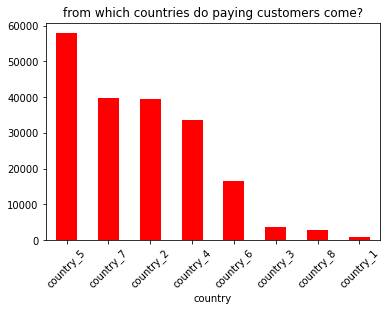

In [0]:
rev_by_loc.plot.bar(title='from which countries do paying customers come?', color= 'red',legend=False)
plt.xticks(rotation=45)
plt.plot()

[]

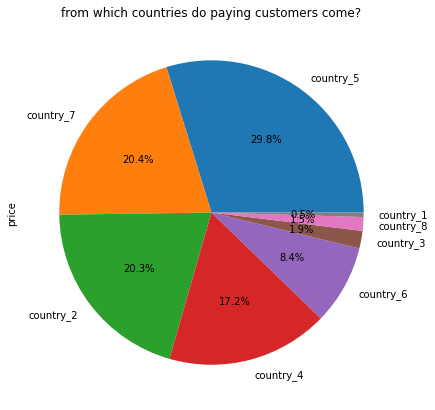

In [0]:
rev_by_loc.plot.pie(y='price', 
                    figsize=(7,7),
                    autopct='%1.1f%%', 
                    title='from which countries do paying customers come?',
                    legend=False)
plt.plot()

## 2. Which products do customers buy?

In [0]:
buy.groupby('user_id').sum().sort_values(by='price', ascending=0).reset_index().groupby('price').count()

,user_id
price,
8,4881
80,8
88,1759


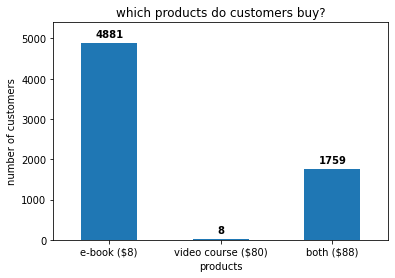

In [0]:
buy.groupby('user_id').sum().sort_values(by='price', ascending=0).reset_index().groupby('price').count().plot.bar(title='which products do customers buy?',legend=False)
plt.xticks(rotation=0)
plt.ylabel('number of customers')
plt.xlabel('products')
for i in range(3):
    plt.text(i , 
             buy.groupby('user_id').sum().sort_values(by='price', ascending=0).reset_index().groupby('price').count()['user_id'].values[i] +150,
             str(buy.groupby('user_id').sum().sort_values(by='price', ascending=0).reset_index().groupby('price').count()['user_id'].values[i]), color='black', ha='center', fontweight='bold')
plt.xticks([0,1,2],['e-book ($8)','video course ($80)','both ($88)'])
plt.ylim(top=5400)
plt.savefig('2.png')

## 3. What may be bottlenecks in the current funnel?

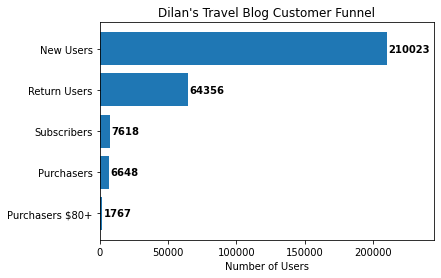

In [0]:
# get data for each of the funnel levels
# plot registrations: first_time
first_time = source.drop_duplicates(subset='user_id').count() #210,023 
# plot subsequent visits to the blog: came_back

# create df to capture how many users come back after their first visit
subsequent_visits = read.groupby('user_id').count().sort_values(by='event', ascending=0)
return_readers = subsequent_visits[subsequent_visits['event'] > 1]
return_readers.count()# 66,231

# plot newsletter subscriptions
subscribers = subscribe.drop_duplicates(subset='user_id').count() #7,618
# plot purchasers 
purchasers = buy.drop_duplicates(subset='user_id').count() # 6648
# plot $80 video course purchasers
premium = paying_profile[paying_profile['price'] >= 80].drop_duplicates(subset='user_id').count() #1767

#set up plot
x=[premium[0], purchasers[0], subscribers[0], return_readers.count()[0], first_time[0], ]
names=('Purchasers $80+', 'Purchasers', 'Subscribers', 'Return Users', 'New Users', )
y_pos= np.arange(len(names))
plt.barh(y_pos, x)
plt.yticks(y_pos, names)
plt.xlabel("Number of Users")
plt.title("Dilan's Travel Blog Customer Funnel")
for i in range(len(x)):
    plt.text(x[i] + 1000, y_pos[i], str(x[i]), color='black', va='center', fontweight='bold')
plt.xlim(right=245000)
plt.savefig('3.png')

## 4. What are the sources of Dilan's readers?

In [0]:
source_read = pd.merge(source, read.drop_duplicates(subset='user_id'), on='user_id').reset_index(drop=True).drop(['event_x', 'event_y', 'topic'], axis=1).drop_duplicates(subset='user_id')
reader_source = source_read.groupby('source').count().reset_index().drop('country',axis=1)
reader_source

,source,user_id
0,AdWords,10460
1,Reddit,105216
2,SEO,41742


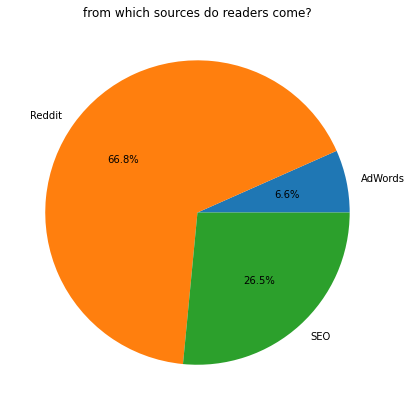

In [0]:
reader_source.plot.pie(y='user_id', 
                       labels=("AdWords", "Reddit", "SEO"), 
                       figsize=(7,7),autopct='%1.1f%%', 
                       title='from which sources do readers come?', 
                       legend=False)
plt.ylabel('')
plt.savefig('4.png')

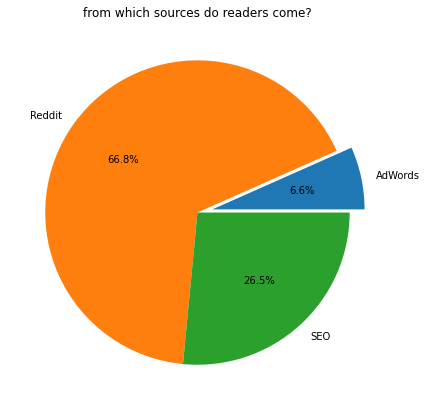

In [0]:
reader_source.plot.pie(y='user_id', 
                       explode=(.1,0,0), 
                       labels=("AdWords", "Reddit", "SEO"), 
                       figsize=(7,7),autopct='%1.1f%%', 
                       title='from which sources do readers come?', 
                       legend=False)
plt.ylabel('')
plt.savefig('4explode.png')

## 5. What are the sources for Dilan's paying users?

In [0]:
paying_profile.groupby('source').sum().drop('user_id', axis=1)

,price
source,
AdWords,27664
Reddit,89760
SEO,77056


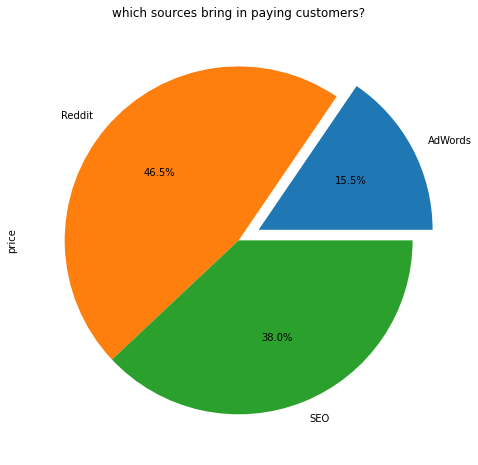

In [0]:
paying_users_by_source = paying_profile.groupby('source').count().drop('user_id', axis=1)
paying_users_by_source.plot.pie(y='price', 
                                figsize=(8,8), 
                                explode=(.13,0,0),
                                title='which sources bring in paying customers?', 
                                autopct='%1.1f%%', 
                                   legend=False
                               )
plt.savefig('5cust.png')

In [0]:
paying_users_by_source

,price,country
source,,
AdWords,1029,1027
Reddit,3094,3094
SEO,2525,2525


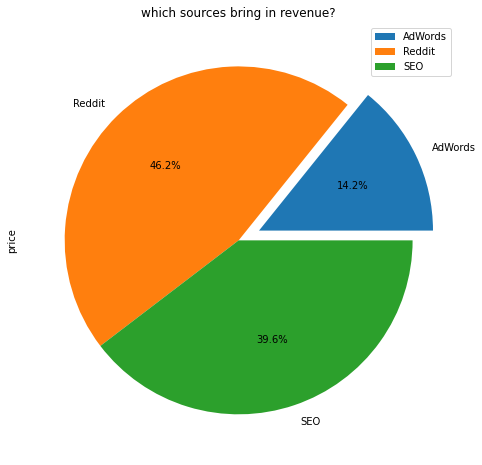

In [0]:
paying_profile.groupby('source').sum().drop('user_id', axis=1).plot.pie(y='price', 
                                                                        figsize=(8,8), 
                                                                        explode=(.13,0,0), 
                                                                        title='which sources bring in revenue?', 
                                                                        autopct='%1.1f%%')
plt.savefig('5rev.png')

## 6. What does the blog activity look like?

In [0]:
events.tail(10)

,user_id,event
day_time,,
2018-03-30 21:04:33,2458339835,subscribe
2018-03-30 21:20:20,2458325538,subscribe
2018-03-30 22:30:56,2458278279,subscribe
2018-03-30 22:32:21,2458336408,subscribe
2018-03-30 22:52:35,2458318598,subscribe
2018-03-30 22:58:30,2458272661,subscribe
2018-03-30 23:05:11,2458258357,subscribe
2018-03-30 23:09:25,2458338958,subscribe
2018-03-30 23:27:52,2458339595,subscribe


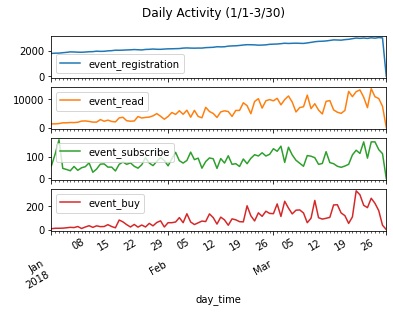

In [0]:
# use pd.get_dummies() to split events into columns

events_dummies = pd.get_dummies(events['2018-01-01':'2018-03-31']).resample('D').sum().reset_index()
events_dummies.plot(y=['event_registration', 'event_read', 'event_subscribe','event_buy'], x='day_time', subplots=True, title="Daily Activity (1/1-3/30)")
plt.savefig('6a.png')

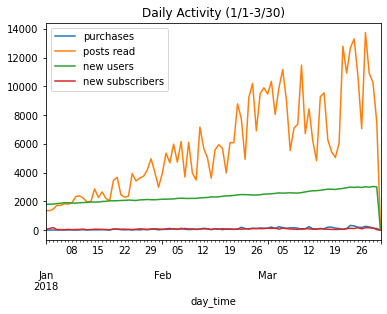

In [0]:
pd.get_dummies(events).resample('D').sum().reset_index().plot(y=['event_buy', 'event_read','event_registration', 'event_subscribe'],
                                                              label=['purchases', 'posts read','new users', 'new subscribers'], x='day_time', title='Daily Activity (1/1-3/30)')
plt.savefig('6b.png')

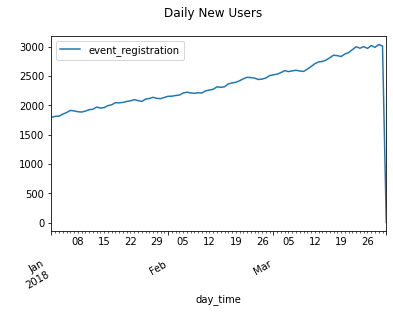

In [0]:
events_dummies.plot(y=['event_registration'], x='day_time', subplots=True, title="Daily New Users")
plt.savefig('6c.png')

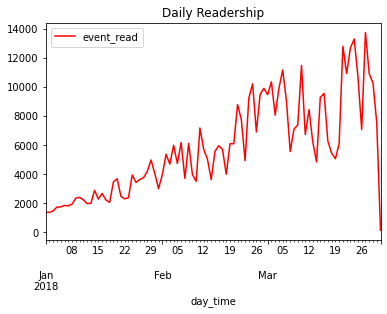

In [0]:
events_dummies.plot(y=['event_read'], x='day_time', title="Daily Readership", color="Red")
plt.savefig('6d.png')

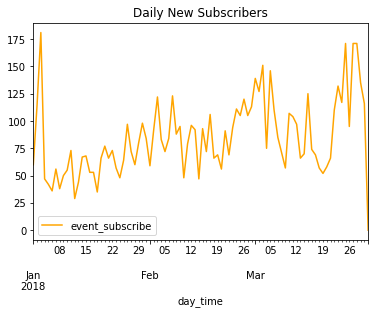

In [0]:
events_dummies.plot(y=['event_subscribe'], x='day_time', title="Daily New Subscribers", color="orange")
plt.savefig('6e.png')

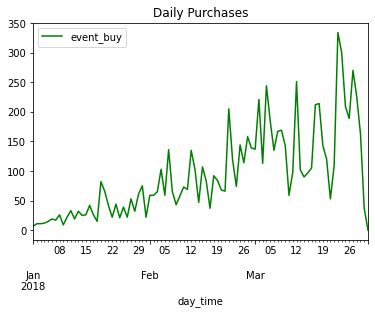

In [0]:
events_dummies.plot(y='event_buy', 
                    x='day_time', 
                    title="Daily Purchases", 
                    color="Green")
plt.savefig('6f.png')

## 7. What does revenue look like?

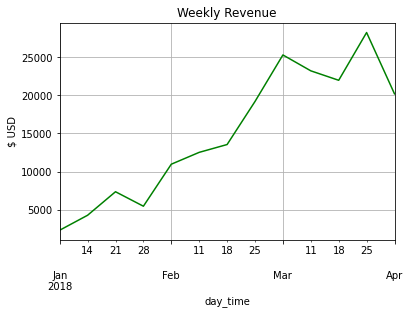

In [0]:
weekly_revenue = buy['price'].resample('W').sum()
weekly_revenue.plot(title='Weekly Revenue', color='Green', grid=True)
plt.ylabel('$ USD')
plt.savefig('7weekly.png')

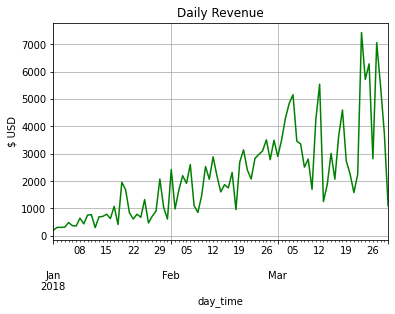

In [0]:
daily_revenue = buy['price'].resample('D').sum()
daily_revenue.plot(title='Daily Revenue', color='Green', grid=True)
plt.ylabel('$ USD')
plt.savefig('7daily.png')

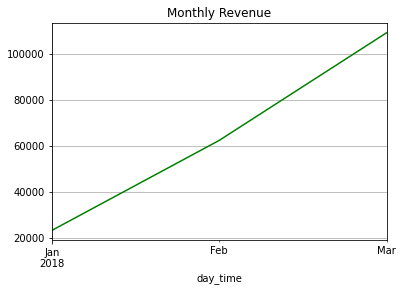

In [0]:
monthly_revenue = buy['price'].resample('M').sum()
monthly_revenue.plot(title='Monthly Revenue', color='Green', grid=True)

In [0]:
# stats about daily revenue
buy['price'].resample('D').sum().describe()

count      89.000000
mean     2185.168539
std      1626.895560
min       200.000000
25%       784.000000
50%      1952.000000
75%      2896.000000
max      7424.000000
Name: price, dtype: float64

In [0]:
#stats about weekly revenue
buy['price'].resample('W').sum().describe()

count       13.000000
mean     14960.000000
std       8611.594045
min       2320.000000
25%       7360.000000
50%      13544.000000
75%      21960.000000
max      28216.000000
Name: price, dtype: float64

## 8. What is Dilan's Return on Investment?

In [0]:
ROI = pd.merge(paying_profile.groupby('source').sum().drop('user_id', axis=1).reset_index(),
               paying_profile.groupby('source').count().reset_index(), how='left', on='source')
ROI = ROI.drop(['price_y', 'country'], axis=1).rename(columns={'price_x':'revenue', 'user_id':'purchasers'})
ROI['investment'] = [(500*3), (250*3),(250*3)]
ROI['cost_per_purchaser'] = ROI.investment / ROI.purchasers
ROI['rev_per_purchaser'] = ROI.revenue / ROI.purchasers
ROI['return_on_investment']= (ROI.revenue -ROI.investment)/ROI.investment
ROI

,source,revenue,purchasers,investment,cost_per_purchaser,rev_per_purchaser,return_on_investment
0,AdWords,27664,1029,1500,1.457726,26.884354,17.442667
1,Reddit,89760,3094,750,0.242405,29.010989,118.680000
2,SEO,77056,2525,750,0.297030,30.517228,101.741333


## 9. Are there sweets spots that are revealed by a segment analysis of paying customers?

In [0]:
# segment analysis
paying_profile.groupby(['source','country']).count().drop('user_id', axis=1).sort_values(by='price', ascending=0).head(10)

price
source  country         
Reddit  country_5    937
        country_2    686
SEO     country_5    654
Reddit  country_7    636
SEO     country_2    616
        country_7    584
Reddit  country_4    521
AdWords country_5    380
        country_4    308
SEO     country_4    267

## Slide Deck
Slides shared on Google Slides ([link](https://docs.google.com/presentation/d/1nHE2ziUZukDETx_233vg8_2CNajYmdvAYOAwnBZSPPY/edit?usp=sharing))

TypeError: ignored

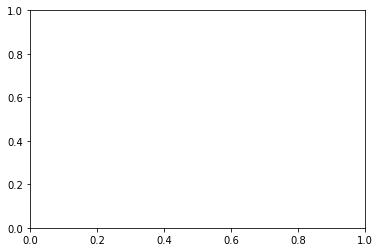

In [0]:
buy_weekly = buy
buy_weekly['day_of_the_week'] = buy_weekly.index.to_series().dt.dayofweek


plt.plot(x=range(7), y=buy_weekly['day_of_the_week'].groupby(buy_weekly['day_of_the_week'].values).count())